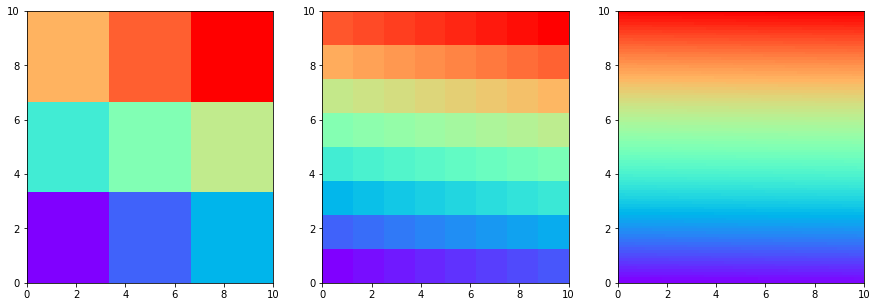

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize=(15,5))

sizelist = [3,8,100]
for i in range(3):
    size = sizelist[i]
    X, Y = np.meshgrid(np.linspace(0, 10, size+1),
                                    np.linspace(0,10,size+1))
    C = np.linspace(0, 100, size*size).reshape(size, size)
    plt.subplot(1,3,i+1)
    plt.pcolormesh(X, Y, C, cmap="rainbow")

plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 散布図に分類の状態を描画する関数
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # 点と塗りのカラーマップ
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])

    plt.figure(figsize=(5, 5))
    # モデルがあれば、表示範囲の点をすべて予測して色を塗る
    if model:
        # 表示範囲を少し広げて分割し、調べる点（200x200）を用意する
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # 全ての点の値を、モデルで予測する
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #　予測結果の値（0〜2）の色（cmap_fills）で塗りつぶす
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        #　境界を灰色で塗る
        plt.contour(XX, YY, pred, colors="gray") 
    #　targetの値（0〜2）の色（cmap_dots）で点を描画する
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

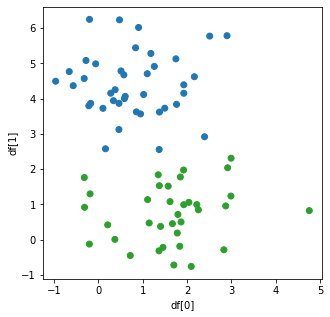

In [26]:
from sklearn.datasets import make_blobs
import pandas as pd

X, y = make_blobs(
    random_state = 0,
    n_features = 2,
    n_samples = 300,
    centers = 2,
    cluster_std = 1
)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)

pred = model.predict(X_test)

df = pd.DataFrame(X_test)
df["target"] = pred

df0=df[df["target"] == 0]
df1=df[df["target"] == 1]

df = pd.DataFrame(X_test)
pred = model.predict(X_test)

plot_boundary(None, df[0], df[1],  pred, "df[0]", "df[1]")

ValueError: 'c' argument has 75 elements, which is inconsistent with 'x' and 'y' with size 300.

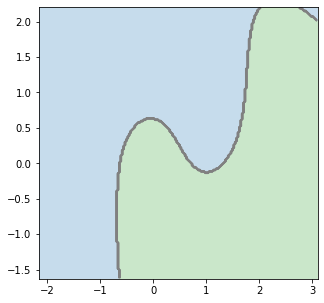

In [20]:
plot_boundary(model, df[0], df[1],  pred, "df[0]", "df[1]")

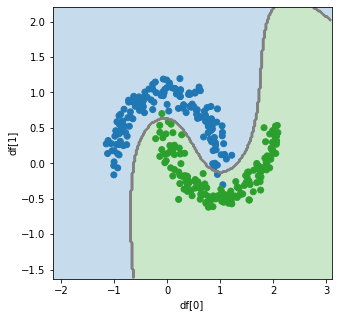

In [19]:
from sklearn.datasets import make_moons
X, y = make_moons(
    random_state = 3,
    noise = 0.1,
    n_samples = 300
)

df = pd.DataFrame(X)

model = svm.SVC()
model.fit(X, y)
plot_boundary(model, df[0], df[1],  y, "df[0]", "df[1]")

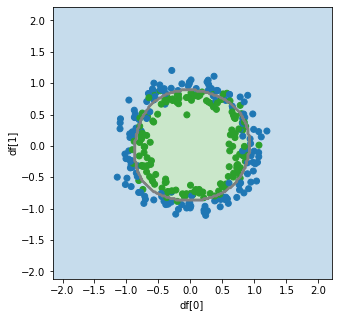

In [23]:
from sklearn.datasets import make_circles
X, y = make_circles(
    random_state = 3,
    noise = 0.1,
    n_samples = 300
)

df = pd.DataFrame(X)

model = svm.SVC()
model.fit(X, y)
plot_boundary(model, df[0], df[1],  y, "df[0]", "df[1]")